<a href="https://colab.research.google.com/github/angwelo/ASSIGNMENT-/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

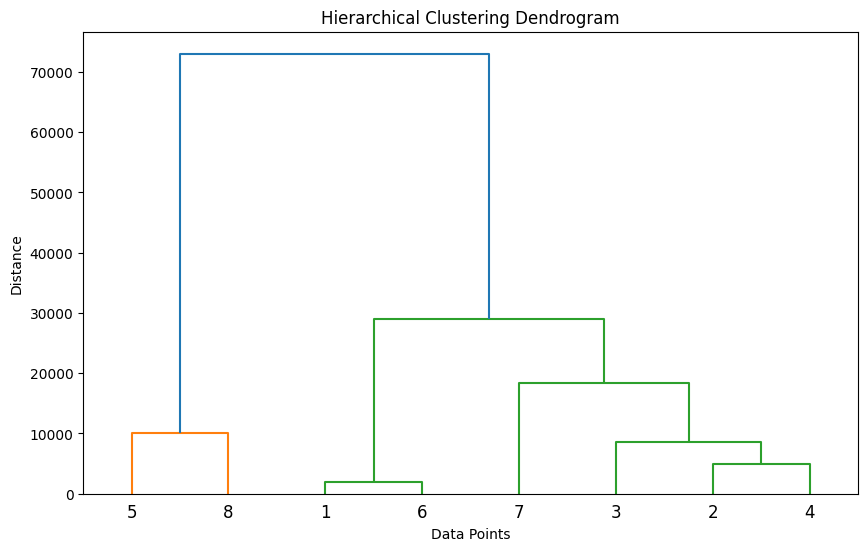

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Age': [25, 30, 45, 35, 50, 23, 40, 60],
    'Income': [30000, 40000, 50000, 45000, 80000, 32000, 60000, 90000]
})

# Linkage matrix
linked = linkage(data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=range(1, len(data)+1),
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

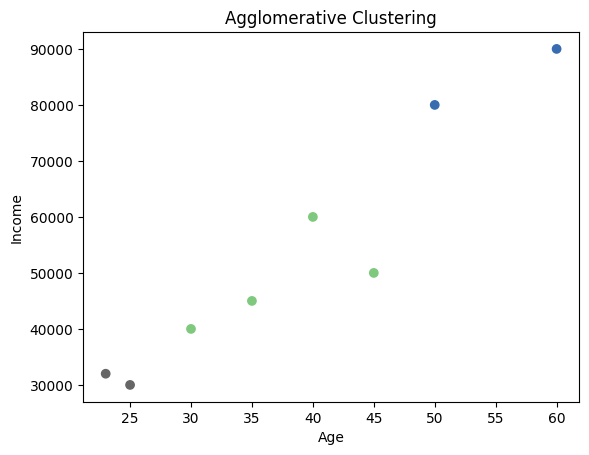

In [2]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with 3 clusters
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Cluster'] = model.fit_predict(data)

# Visualize
plt.scatter(data['Age'], data['Income'], c=data['Cluster'], cmap='Accent')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Agglomerative Clustering')
plt.show()

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize
scaled_data = StandardScaler().fit_transform(data[['Age', 'Income']])

# Cluster
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(scaled_data)

# Score
score = silhouette_score(scaled_data, labels)
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.4776
